In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm
from statsmodels.iolib.summary2 import summary_col


df_mna = pd.read_excel('./Data/Part 2 - M&A data.xlsx', sheet_name='Data')

In [3]:
df_mna.columns = df_mna.iloc[0]
df_mna = df_mna.drop(0)



In [4]:
# Calculate average deal premiums for different categories
# a) Average deal premium:
mean_premium = df_mna['deal_premium'].mean()
print(f"Average deal premium: {mean_premium:.2f}%")


#b) Average deal premium high-tech:
mean_premium_tech = df_mna[df_mna['acq_hightech'] == 1]['deal_premium'].mean()
print(f"Average deal premium high-tech: {mean_premium_tech:.2f}%")

#c) Average deal premium non-tech:
mean_premium_nontech = df_mna[df_mna['acq_hightech'] == 0]['deal_premium'].mean()
print(f"Average deal premium non-tech: {mean_premium_nontech:.2f}%")

#descriptive statistics
print("Deal premium statistics:")
print(f"Mean: {df_mna.deal_premium.mean():.2f}")
print(f"Std: {df_mna.deal_premium.std():.2f}")
print(f"Min: {df_mna.deal_premium.min():.2f}")
print(f"Max: {df_mna.deal_premium.max():.2f}")
print(f"25%: {df_mna.deal_premium.quantile(0.25):.2f}")
print(f"50%: {df_mna.deal_premium.quantile(0.50):.2f}")
print(f"75%: {df_mna.deal_premium.quantile(0.75):.2f}")


Average deal premium: 33.36%
Average deal premium high-tech: 37.19%
Average deal premium non-tech: 31.97%
Deal premium statistics:
Mean: 33.36
Std: 45.20
Min: -100.00
Max: 500.00
25%: 10.44
50%: 26.00
75%: 46.94


In [5]:
df_mna['same_country'] = df_mna['acq_nation'] == df_mna['tar_nation']
df_mna.same_country.value_counts()

same_country
True     11206
False     2651
Name: count, dtype: int64

In [6]:
#d) Average deal premium cross-border:
mean_premium_cross_border = df_mna[df_mna['same_country'] == False]['deal_premium'].mean()
print(f"Average deal premium cross-border: {mean_premium_cross_border:.2f}%")

#e) Average deal premium domestic:
mean_premium_domestic = df_mna[df_mna['same_country'] == True]['deal_premium'].mean()
print(f"Average deal premium domestic: {mean_premium_domestic:.2f}%")



Average deal premium cross-border: 36.52%
Average deal premium domestic: 32.61%


In [7]:
df_mna['same_industry'] = df_mna.acq_sic4 == df_mna.tar_sic4
df_mna.same_industry.value_counts()
#f) Average deal premium cross-industry:
mean_premium_cross_industry = df_mna[df_mna['same_industry'] == False]['deal_premium'].mean()
print(f"Average deal premium cross-industry: {mean_premium_cross_industry:.2f}%")

#g) Average deal premium within-industry:
mean_premium_within_industry = df_mna[df_mna['same_industry'] == True]['deal_premium'].mean()
print(f"Average deal premium within-industry: {mean_premium_within_industry:.2f}%")

Average deal premium cross-industry: 33.58%
Average deal premium within-industry: 32.92%


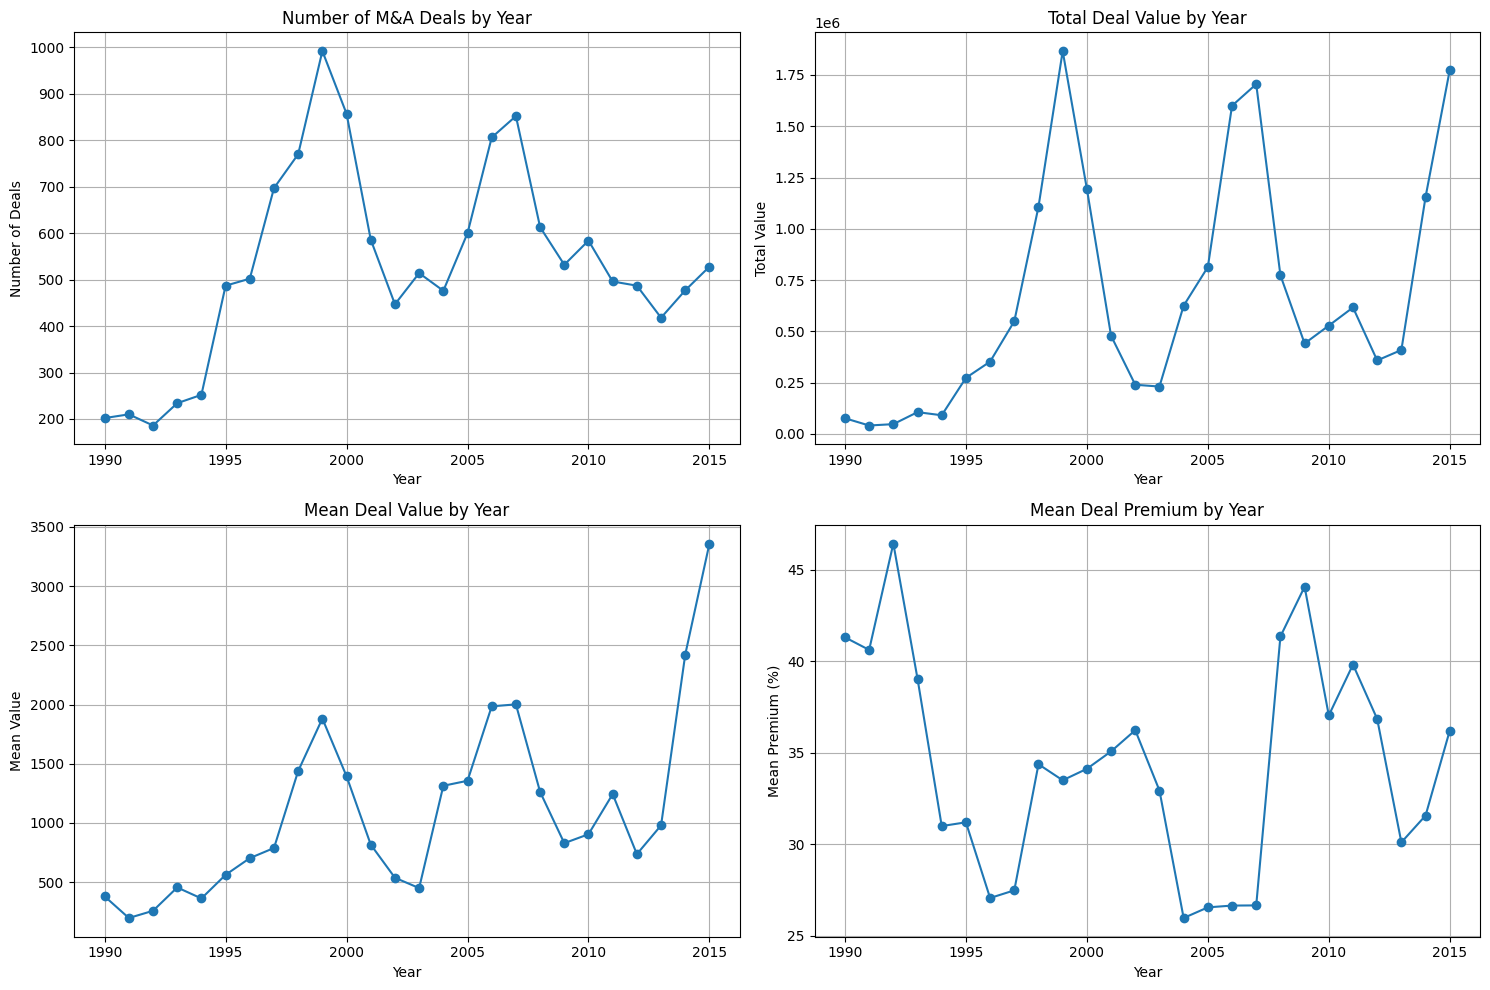

0         deal_value                              deal_premium
               count             sum         mean         mean
deal_year                                                     
1990             202    76703.775587   379.721661    41.316944
1991             210    41361.535179   196.959691    40.628768
1992             186    47956.731038   257.831887     46.44564
1993             234   106450.791323   454.917912    39.051383
1994             252    91260.548256   362.145033    30.992863
1995             487   273487.466782   561.575907    31.197804
1996             502    352690.14332   702.570007    27.058047
1997             697   549443.069047   788.297086    27.477338
1998             770  1107786.908427  1438.684297     34.37445
1999             992  1866562.201485  1881.615122    33.497525
2000             857  1194774.463067  1394.135896    34.123905
2001             586   478623.532613   816.763708    35.077006
2002             447   239974.097289   536.854804    36.236753
2003             514   231204.600066   449.814397    32.937263
2004             476   625428.206653  1313.924804    25.964123
2005             600   813730.569572  1356.217616    26.545711
2006             806  1599965.344414  1985.068666    26.643751
2007             852   1705303.39674  2001.529808    26.653034
2008             613     773669.7716  1262.104032    41.362271
2009             532   441108.387214   829.151104    44.083704
2010             584   528214.279976   904.476507    37.044955
2011             496   616749.630599  1243.446836    39.826199
2012             487   358573.792086   736.291154    36.850174
2013             418   409396.550637   979.417585    30.101642
2014             477  1155548.271469  2422.533064    31.568752
2015             528  1774117.290914  3360.070627    36.214619

In [8]:
df_yearlydeals = df_mna.groupby('deal_year').agg({ 
                                                  'deal_value': ['count','sum', 'mean'], 
                                                  'deal_premium': 'mean'})
df_yearlydeals.head(10)

import matplotlib.pyplot as plt

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15,10))

ax1.plot(df_yearlydeals.index, df_yearlydeals[('deal_value','count')], marker='o')
ax1.set_title('Number of M&A Deals by Year')
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Deals')
ax1.grid(True)

ax2.plot(df_yearlydeals.index, df_yearlydeals[('deal_value','sum')], marker='o')
ax2.set_title('Total Deal Value by Year')
ax2.set_xlabel('Year') 
ax2.set_ylabel('Total Value')
ax2.grid(True)

ax3.plot(df_yearlydeals.index, df_yearlydeals[('deal_value','mean')], marker='o')
ax3.set_title('Mean Deal Value by Year')
ax3.set_xlabel('Year')
ax3.set_ylabel('Mean Value')
ax3.grid(True)

ax4.plot(df_yearlydeals.index, df_yearlydeals[('deal_premium','mean')], marker='o')
ax4.set_title('Mean Deal Premium by Year')
ax4.set_xlabel('Year')
ax4.set_ylabel('Mean Premium (%)')
ax4.grid(True)

plt.tight_layout()
plt.show()

df_yearlydeals


In [9]:
df_yearlydeals['year_temp'] = df_yearlydeals.index
df_yearlydeals.corr()

0                  deal_value                     deal_premium year_temp
                        count       sum      mean         mean          
0                                                                       
deal_value   count   1.000000  0.805170  0.569233    -0.448668  0.331505
             sum     0.805170  1.000000  0.910053    -0.367489  0.455880
             mean    0.569233  0.910053  1.000000    -0.314723  0.628467
deal_premium mean   -0.448668 -0.367489 -0.314723     1.000000 -0.132204
year_temp            0.331505  0.455880  0.628467    -0.132204  1.000000

In [10]:
# Prepare data for year analysis
X_year = df_mna['deal_year'].apply(pd.to_numeric).values
y_premium = df_mna['deal_premium'].apply(pd.to_numeric).values


# Create and fit model
year_model = sm.OLS(y_premium, X_year).fit()

# Print results in APA style
print("\nYear analysis:")
print(year_model.summary().as_text())

# Print number of observations
print(f"\nNumber of observations: {len(X_year)}")







Year analysis:
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.353
Model:                            OLS   Adj. R-squared (uncentered):              0.353
Method:                 Least Squares   F-statistic:                              7550.
Date:                Thu, 06 Feb 2025   Prob (F-statistic):                        0.00
Time:                        10:29:00   Log-Likelihood:                         -72471.
No. Observations:               13857   AIC:                                  1.449e+05
Df Residuals:                   13856   BIC:                                  1.450e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------

In [12]:
df_clean

,tar_sales,tar_ni,tar_hightech,deal_value,tar_sales,deal_year,same_country,same_industry,deal_premium
1,117.933998,-62.299999,0,66.769997,117.933998,1990,1,0,-36.363636
2,10.560000,1.400000,0,21.209999,10.560000,1990,1,0,54.545456
3,27.410000,1.200000,0,19.840000,27.410000,1990,1,1,-5.162793
4,50.771000,3.400000,0,44.310001,50.771000,1990,1,0,36.178574
5,81.837997,6.500000,0,87.000000,81.837997,1990,1,0,27.272728
...,...,...,...,...,...,...,...,...,...
13851,28.594000,-4.700000,0,13.736000,28.594000,2015,1,0,13.924050
13853,2.154000,-18.500000,0,12.572000,2.154000,2015,1,0,246.153854
13854,15.027000,2.700000,1,30.292999,15.027000,2015,1,1,24.121778
13856,256.394012,0.100000,0,40.858002,256.394012,2015,0,0,79.487175


In [13]:
# Prepare independent variables
df_clean = df_mna[[
            'tar_ni', 
            'tar_hightech', 
            'deal_value',
            'tar_sales',
            'deal_year',
            'same_country', 
            'same_industry',
            'deal_premium']].dropna()

# Convert boolean columns to numeric (0/1)
df_clean['same_country'] = df_clean['same_country'].astype(int)
df_clean['same_industry'] = df_clean['same_industry'].astype(int)

# Ensure all columns are numeric
df_clean = df_clean.apply(pd.to_numeric)



X = df_clean[['tar_sales',
            'tar_ni', 
            'tar_hightech', 
            'deal_value',
            'deal_year', 
            'same_country', 
            'same_industry']]
y = df_clean['deal_premium']

# Add constant term
X = sm.add_constant(X)

# Create and fit model
model = sm.OLS(y, X).fit()

# Print results in APA style
print("\nMultiple Regression Results:")
print(model.summary().as_text())

# Print number of observations 
print(f"\nNumber of observations: {len(X)}")




Multiple Regression Results:
                            OLS Regression Results                            
Dep. Variable:           deal_premium   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     13.51
Date:                Thu, 06 Feb 2025   Prob (F-statistic):           1.69e-17
Time:                        10:30:31   Log-Likelihood:                -65494.
No. Observations:               12629   AIC:                         1.310e+05
Df Residuals:                   12621   BIC:                         1.311e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           